<a href="https://colab.research.google.com/github/laribar/TechChallenge2/blob/main/TechChallenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:

# URL do arquivo bruto
url = 'https://raw.githubusercontent.com/laribar/TechChallenge2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv'

# Leia o CSV usando pandas
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame
print(df.head())

         Data   Último  Abertura   Máxima   Mínima    Vol.    Var%
0  31.01.2025  127.138   126.914  127.532  126.783   3,31M   0,18%
1  30.01.2025  126.913   123.433  127.169  123.432  11,69B   2,82%
2  29.01.2025  123.432   124.056  124.767  123.278   7,35B  -0,50%
3  28.01.2025  124.056   124.861  124.881  123.973   8,31B  -0,65%
4  27.01.2025  124.862   122.443  124.862  122.207  11,02B   1,97%


In [37]:
# Renomear a coluna 'último' para 'fechamento'
df.rename(columns={'Último': 'Fechamento'}, inplace=True)

# Visualizar as primeiras linhas após renomear as colunas
print("\nColunas após a renomeação:")
print(df.columns)

# Exibir as primeiras linhas do DataFrame para confirmar a alteração
print(df.head())


Colunas após a renomeação:
Index(['Data', 'Fechamento', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')
         Data  Fechamento  Abertura   Máxima   Mínima    Vol.    Var%
0  31.01.2025     127.138   126.914  127.532  126.783   3,31M   0,18%
1  30.01.2025     126.913   123.433  127.169  123.432  11,69B   2,82%
2  29.01.2025     123.432   124.056  124.767  123.278   7,35B  -0,50%
3  28.01.2025     124.056   124.861  124.881  123.973   8,31B  -0,65%
4  27.01.2025     124.862   122.443  124.862  122.207  11,02B   1,97%


In [38]:
# Supondo que você já tenha carregado os dados e renomeado a coluna conforme necessário

# Converter a coluna 'Data' para o tipo datetime, caso ainda não esteja
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Verifique se houve alguma falha ao converter
if df['Data'].isnull().any():
    print("Atenção: Existem valores em 'Data' que não puderam ser convertidos. Verifique suas entradas de dados.")

# Definir 'Data' como índice
df.set_index('Data', inplace=True)

# Verifique as primeiras linhas para confirmar a mudança
print(df.head())

            Fechamento  Abertura   Máxima   Mínima    Vol.    Var%
Data                                                              
2025-01-31     127.138   126.914  127.532  126.783   3,31M   0,18%
2025-01-30     126.913   123.433  127.169  123.432  11,69B   2,82%
2025-01-29     123.432   124.056  124.767  123.278   7,35B  -0,50%
2025-01-28     124.056   124.861  124.881  123.973   8,31B  -0,65%
2025-01-27     124.862   122.443  124.862  122.207  11,02B   1,97%


<ipython-input-38-b985c217a580>:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data'] = pd.to_datetime(df['Data'], errors='coerce')


In [39]:
# Resumo estatístico dos dados
print(df.describe())

        Fechamento     Abertura       Máxima       Mínima
count  1267.000000  1267.000000  1267.000000  1267.000000
mean    113.693380   113.684750   114.686967   112.688303
std      12.711076    12.705354    12.432272    12.957187
min      63.570000    63.604000    67.604000    61.691000
25%     106.141000   106.133000   107.109500   105.047500
50%     114.979000   114.977000   115.729000   113.635000
75%     122.951000   122.918000   123.772500   122.098500
max     137.344000   137.349000   137.469000   136.664000


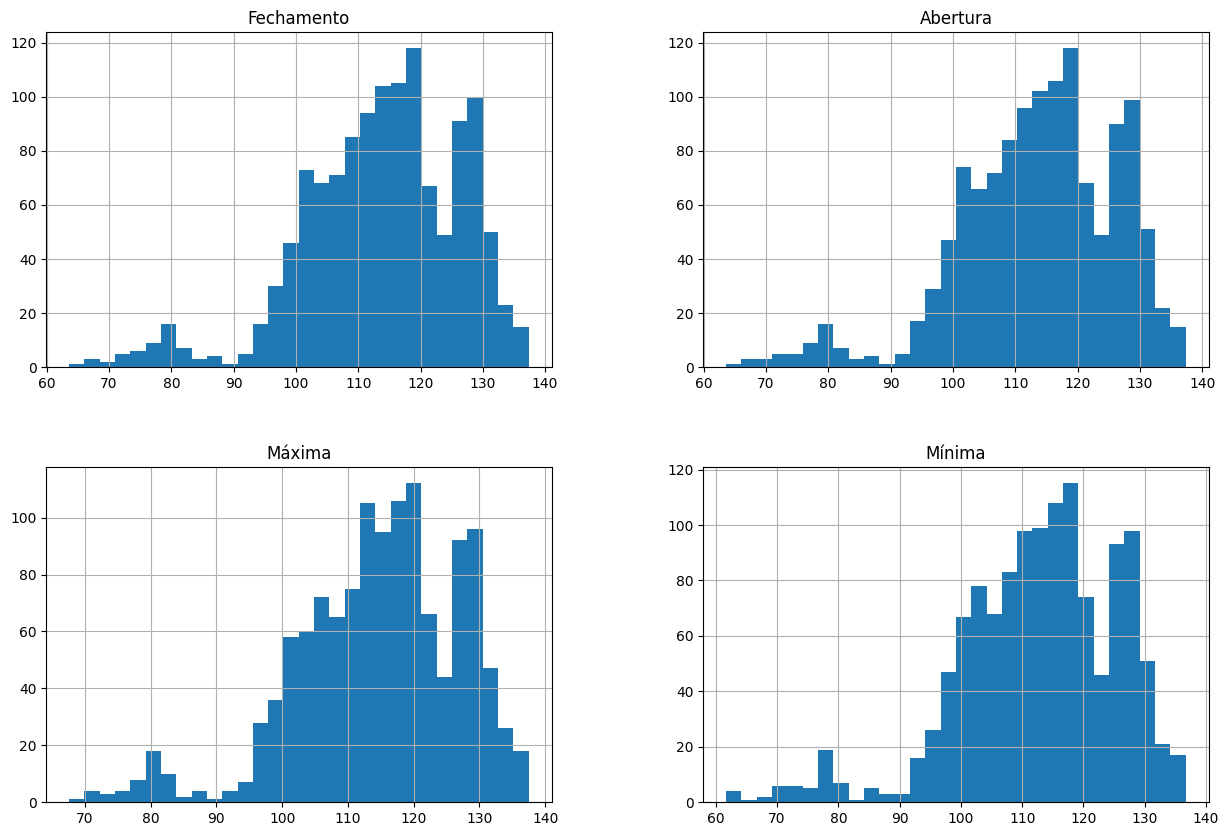

In [40]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

In [41]:

# Defina uma função para converter os valores da coluna 'Vol.' em um formato numérico válido
def convert_to_float(value):
    try:
        if 'M' in value:
            return float(value.replace('M', '').replace(',', '.')) * 1e6
        elif 'K' in value:
            return float(value.replace('K', '').replace(',', '.')) * 1e3
        else:
            return float(value.replace(',', '.'))
    except ValueError:
        return None  # ou algum valor padrão caso de erro

# Aplicando a função de conversão à coluna 'Vol.'
df['Vol.'] = df['Vol.'].map(convert_to_float)

# Verificar as primeiras linhas para confirmar a transformação
print(df[['Vol.']].head())

                 Vol.
Data                 
2025-01-31  3310000.0
2025-01-30        NaN
2025-01-29        NaN
2025-01-28        NaN
2025-01-27        NaN


In [52]:
# Mostra exemplos de valores que não puderam ser convertidos
problemas = df[df['Vol.'].isna()]['Vol.']
print(problemas.head(10))  # Exibir alguns valores problemáticos

Series([], Name: Vol., dtype: float64)


In [43]:
def convert_to_float(value):
    try:
        # Remover possíveis whitespaces e trocar vírgula por ponto
        clean_value = str(value).strip().replace('.', '').replace(',', '.')

        # Funcionar para milhões e milhares
        if 'M' in clean_value:
            return float(clean_value.replace('M', '')) * 1e6
        elif 'K' in clean_value:
            return float(clean_value.replace('K', '')) * 1e3
        elif '%' in clean_value:
            return float(clean_value.replace('%', '')) / 100
        else:
            return float(clean_value)
    except Exception as e:
        print(f"Erro ao converter valor '{value}': {e}")
        return None

# Re-aplicar limpeza da coluna
df['Vol.'] = df['Vol.'].map(lambda x: convert_to_float(x) if isinstance(x, str) else x)
# Substituir NaN por um valor padrão, por exemplo 0, ou usar técnica estatística
df['Vol.'].fillna(0, inplace=True)  #_substituir por média, mediana se fizer sentido para a análise
# Mostrar as primeiras linhas após tentativa de nova conversão
print(df[['Vol.']].head())


                 Vol.
Data                 
2025-01-31  3310000.0
2025-01-30        0.0
2025-01-29        0.0
2025-01-28        0.0
2025-01-27        0.0


<ipython-input-43-e34cdeb6f17a>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vol.'].fillna(0, inplace=True)  #_substituir por média, mediana se fizer sentido para a análise


In [44]:
def percent_to_float(percent_str):
    try:
        return float(percent_str.replace(',', '.').replace('%', '')) / 100
    except ValueError:
        return None

# Suponha que a coluna 'Var%' contenha valores percentuais
df['Var%'] = df['Var%'].map(lambda x: percent_to_float(x) if isinstance(x, str) else x)

# Verifique as primeiras linhas para certificar-se da conversão adequada
print(df[['Var%']].head())

              Var%
Data              
2025-01-31  0.0018
2025-01-30  0.0282
2025-01-29 -0.0050
2025-01-28 -0.0065
2025-01-27  0.0197


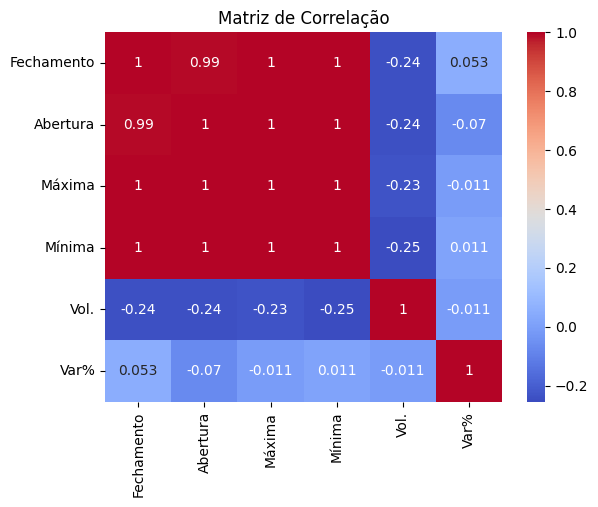

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [46]:
# Preencher ou remover valores ausentes
df.fillna(method='ffill', inplace=True)

<ipython-input-46-b3ecaff05721>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [47]:
# Confira a lista de colunas ou visualize o índice do DataFrame
print("Colunas do DataFrame:")
print(df.columns.tolist())

print("\nNome do Índice:")
print(df.index.name)

Colunas do DataFrame:
['Fechamento', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%']

Nome do Índice:
Data


In [48]:
# Exemplo acessando valores diretamente baseados no índice
print(df.loc['2025-01-30'])  # Supondo um acesso específico

Fechamento    126.9130
Abertura      123.4330
Máxima        127.1690
Mínima        123.4320
Vol.            0.0000
Var%            0.0282
Name: 2025-01-30 00:00:00, dtype: float64


In [49]:
# Variável alvo (dependente)
y = df['Fechamento']

# Variáveis preditoras (independentes) - adaptável conforme análise aprofundada
X = df.drop(columns=['Fechamento', 'Var%'])  # Exclua colunas desnecessárias como 'Var%', por exemplo

# Dividir o conjunto de dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar conjuntos
print("Conjuntos de treino:", X_train.shape, y_train.shape)
print("Conjuntos de teste:", X_test.shape, y_test.shape)

Conjuntos de treino: (1013, 4) (1013,)
Conjuntos de teste: (254, 4) (254,)


In [51]:
# Criar instância do modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Ordenar os dados se necessário - geralmente por data é essencial para séries temporais
df.sort_index(inplace=True)

# Verificar o dataset
print(df.head())

            Fechamento  Abertura   Máxima   Mínima       Vol.    Var%
Data                                                                 
2020-01-02     118.573   115.652  118.573  115.649  5160000.0  0.0253
2020-01-03     117.707   118.564  118.792  117.341  6830000.0 -0.0073
2020-01-06     116.878   117.707  117.707  116.269  6570000.0 -0.0070
2020-01-07     116.662   116.872  117.076  115.965  4850000.0 -0.0018
2020-01-08     116.247   116.667  117.335  115.693  5910000.0 -0.0036


In [62]:
# Definir o ponto de tradução na divisão temporal, por exemplo, usando até 2022 para treino
train = df.loc[:'2024'].copy()
test = df.loc['2025':].copy()

# Verificar se a divisão está correta
print("Conjunto de treino até:", train.index.max())
print("Conjunto de teste de:", test.index.min())

Conjunto de treino até: 2024-12-30 00:00:00
Conjunto de teste de: 2025-01-02 00:00:00


In [63]:

# Use deslocamentos (lags) nos dados pode ser uma técnica adicional mesmo em modelos que não sejam tradicionais para séries da regressão.
train['Lag1'] = train['Fechamento'].shift(1)

# Remover valores nulos iniciais
train.dropna(inplace=True)

# Aplicar o modelo para ajuste no conjunto de treino
X_train = train[['Lag1']]  # Exemplo simples de uma variável de atraso
y_train = train['Fechamento']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Corrigir coluna Lag1 no conjunto de teste para dados semelhantes a treino
test['Lag1'] = test['Fechamento'].shift(1)

# Atualizar dados removendo NaN provenientes de deslocamento
X_test = test[['Lag1']].dropna()
y_test = test.loc[X_test.index, 'Fechamento']  # Garantir mesmo índice de X_test

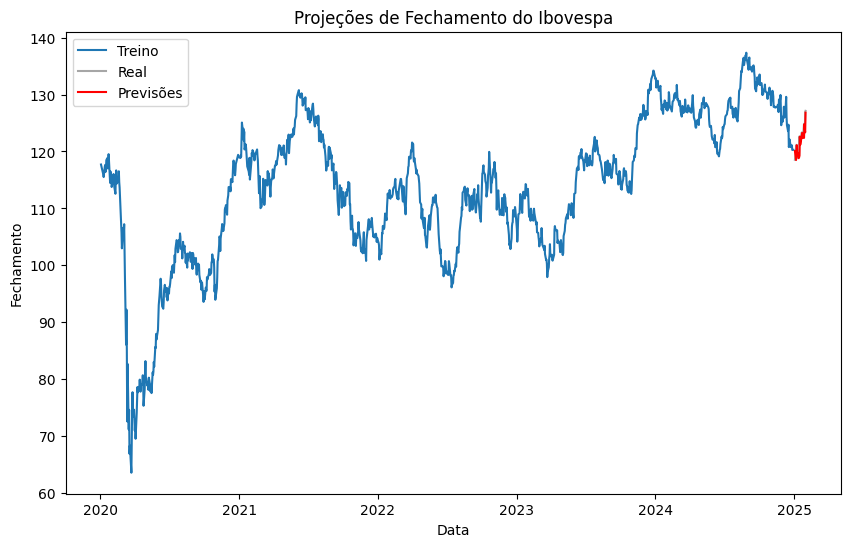

In [65]:
# Treine o modelo - repasse necessário, se o conjunto de lag reside em atualização contínua.
# model.fit(X_train, y_train)  # Note que isso foi aplicado

# Previsão no conjunto de testes atualizado
y_pred = model.predict(X_test)

# Empregar especificações como DataFrame regular alinhado para prever/real
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Fechamento'], label='Treino')
plt.plot(X_test.index, y_test, color='grey', alpha=0.7, label='Real')  # Conforme retemperado veja índice chegar.
plt.plot(X_test.index, y_pred, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Projeções de Fechamento do Ibovespa')
plt.legend()
plt.show()

In [66]:
# Assegure-se de que a coluna 'Data' está no tipo datetime e é o índice
df.index = pd.to_datetime(df.index)

# Dividir o dataset em treino até 2025-01-25 e teste dos últimos 5 dias
cutoff_date = '2025-01-25'
train = df.loc[:cutoff_date].copy()
test = df.loc[cutoff_date:].copy()

print("Período de treino até:", train.index.max())
print("Período de testes a partir de:", test.index.min())

Período de treino até: 2025-01-24 00:00:00
Período de testes a partir de: 2025-01-27 00:00:00


In [68]:
# Use deslocamento para seuo ámbito de treinamento
train['Lag1'] = train['Fechamento'].shift(1)
train.dropna(inplace=True)  # Remova quaisquer `NaN` que resultam do deslocamento

In [69]:
# Defina as variáveis preditoras e alvo
X_train = train[['Lag1']]
y_train = train['Fechamento']

# Criação do modelo e ajuste
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [72]:
# Preparar dados de teste considerando como tentativa predictor nos hábitos da mesma
test['Lag1'] = test['Fechamento'].shift(1)
X_test = test[['Lag1']].dropna()  # Eliminando qualquer linha subsequente a falha de valor ocorrido

# Colocar previsões
y_pred = modelo.predict(X_test)
test.loc[X_test.index, 'Previsoes'] = y_pred

print("Previsões ajustadas para últimos 5 dias:")
print(test[['Fechamento', 'Previsoes']])

Previsões ajustadas para últimos 5 dias:
            Fechamento   Previsoes
Data                              
2025-01-27     124.862         NaN
2025-01-28     124.056  124.777795
2025-01-29     123.432  123.978064
2025-01-30     126.913  123.358917
2025-01-31     127.138  126.812843


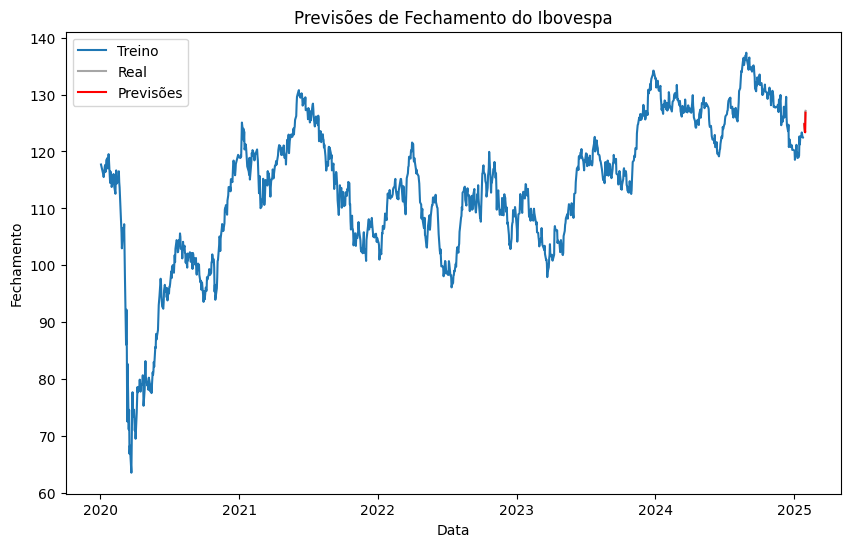

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Fechamento'], label='Treino')
plt.plot(test.index, test['Fechamento'], color='grey', alpha=0.7, label='Real')
plt.plot(test.index, test['Previsoes'], color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Previsões de Fechamento do Ibovespa')
plt.legend()
plt.show()

In [75]:
# Verifique quais linhas têm valores NaN na coluna 'Fechamento'
print(test[['Fechamento', 'Previsoes']].isna().sum())

# Remova quaisquer linhas nas quais 'Previsoes' ou 'Fechamento' contenham 'NaN'
test_dropna = test.dropna(subset=['Fechamento', 'Previsoes'])

# Calcule novamente as métricas usando apenas linhas válidas
mae = mean_absolute_error(test_dropna['Fechamento'], test_dropna['Previsoes'])
mse = mean_squared_error(test_dropna['Fechamento'], test_dropna['Previsoes'])
rmse = np.sqrt(mse)  # Requer numpy
r2 = r2_score(test_dropna['Fechamento'], test_dropna['Previsoes'])

# Exiba os resultados
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Fechamento    0
Previsoes     1
dtype: int64
Erro Médio Absoluto (MAE): 1.29
Erro Quadrático Médio (MSE): 3.39
Raiz do Erro Quadrático Médio (RMSE): 1.84
Coeficiente de Determinação (R²): -0.23


In [78]:
# Exemplo genérico de criação de features
# Ajuste conforme a estrutura dos seus dados
df['Lag1'] = df['Fechamento'].shift(1)
df.dropna(inplace=True)  # Remove NaN após a aplicação do shift

# Supondo apenas Lag1 para simplificação, mas você deve adicionar mais se necessárias
features = df[['Lag1']]
target = df['Fechamento']

In [79]:
from sklearn.model_selection import train_test_split

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Instanciar modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Ajustar o modelo com dados de treino
rf.fit(X_train, y_train)

# Prever com conjunto de teste
rf_predictions = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest RMSE: 2.09


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcule métricas mais detalhadas
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

# Exiba as métricas calculadas
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MAE: 1.46
Random Forest MSE: 4.37
Random Forest RMSE: 2.09
Random Forest R²: 0.98


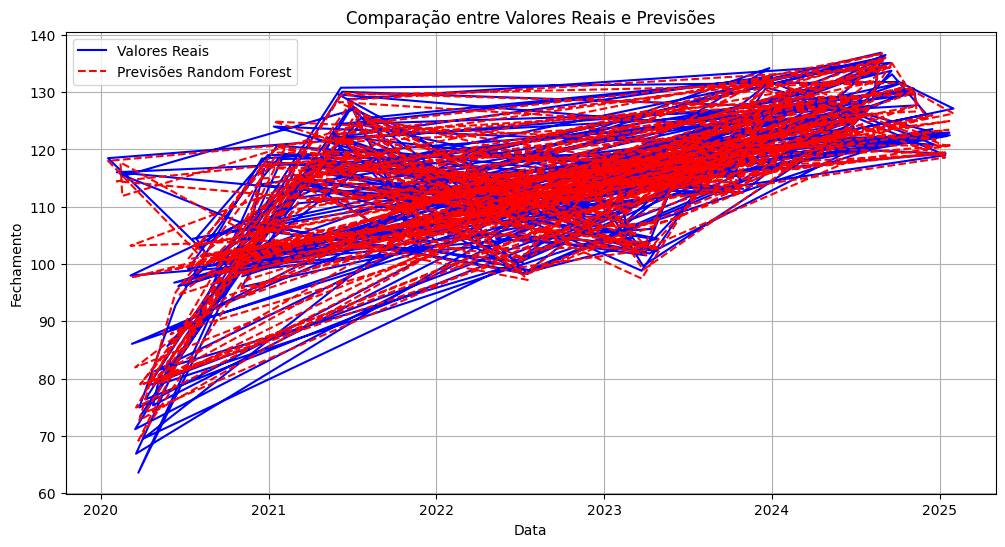

In [82]:

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Plote os valores reais
plt.plot(y_test.index, y_test, label='Valores Reais', color='blue')

# Plote as previsões
plt.plot(y_test.index, rf_predictions, label='Previsões Random Forest', color='red', linestyle='--')

# Título e legendas
plt.title('Comparação entre Valores Reais e Previsões')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

# Mostre o gráfico
plt.show()

In [84]:
# Instanciar o modelo Random Forest treinado anteriormente
rf = RandomForestRegressor(random_state=42)

# Caminho correto considerando que rf foi usado anteriormente:
rf.fit(X_train, y_train)

# Então vamos com previsões para novos dados
best_rf = rf  # Use rf diretamente se best_rf não estiver definido

In [85]:

# Supondo você quer prever os próximos 5 dias baseados na última observação
last_observation = df['Fechamento'].iloc[-1]
future_dates = pd.date_range(start=df.index[-1], periods=6, freq='D')[1:]  # Define os próximos 5 dias

# Considerando 'Lag1' usada como exemplo ou ajuste conforme suas features
future_features = pd.DataFrame({'Lag1': [last_observation] * len(future_dates)}, index=future_dates)

future_predictions = rf.predict(future_features)

# Exibir as previsões futuras
print("Previsões para os próximos 5 dias:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"{date.date()}: {prediction:.2f}")

Previsões para os próximos 5 dias:
2025-02-01: 127.06
2025-02-02: 127.06
2025-02-03: 127.06
2025-02-04: 127.06
2025-02-05: 127.06


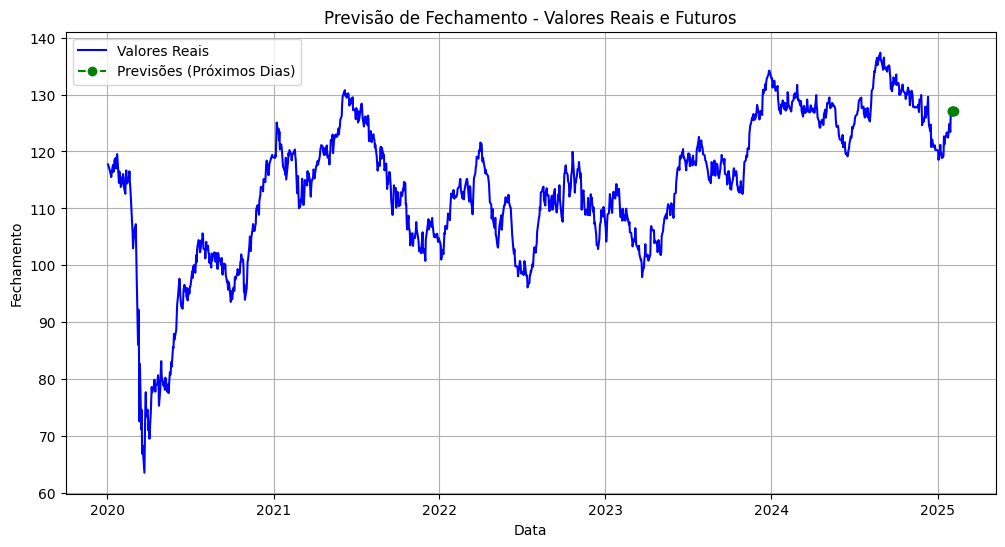

In [86]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Plot valores reais
plt.plot(df.index, df['Fechamento'], label='Valores Reais', color='blue')

# Adicione previsões para os próximos dias
plt.plot(future_dates, future_predictions, label='Previsões (Próximos Dias)', color='green', linestyle='--', marker='o')

# Configurações do gráfico
plt.title('Previsão de Fechamento - Valores Reais e Futuros')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()

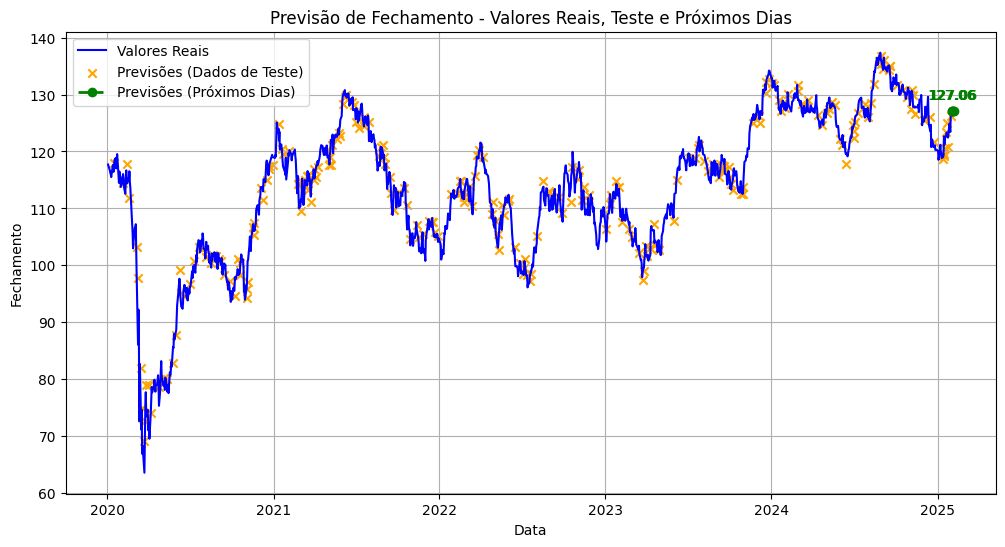

In [89]:
import matplotlib.pyplot as plt

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Plotar os valores reais
plt.plot(df.index, df['Fechamento'], label='Valores Reais', color='blue')

# Plotar as previsões do conjunto de teste
plt.scatter(y_test.index, rf_predictions, label='Previsões (Dados de Teste)', color='orange', marker='x')

# Plotar as previsões futuras
plt.plot(future_dates, future_predictions, label='Previsões (Próximos Dias)', color='green', linestyle='--', marker='o', linewidth=2)

# Adicionar rótulos acima das bolinhas de previsão futura
for date, prediction in zip(future_dates, future_predictions):
    plt.text(date, prediction + 2,  # desloca +2 para cima no eixo Y
             f'{prediction:.2f}',  # formatação com 2 casas decimais
             color='green', fontsize=10, ha='center')

# Configuração do gráfico
plt.title('Previsão de Fechamento - Valores Reais, Teste e Próximos Dias')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()


In [98]:
# Adicionado mais lags e recursos derivados
df['Lag1'] = df['Fechamento'].shift(1)
df['Lag2'] = df['Fechamento'].shift(2)
df['Lag3'] = df['Fechamento'].shift(3)
df['Daily_Return'] = df['Fechamento'].pct_change()
df.dropna(inplace=True)

# Features para treino
X = df[['Lag1', 'Lag2', 'Lag3', 'Daily_Return']]
y = df['Fechamento']

# Re-treino do modelo
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [99]:
import numpy as np

# Simulação com variabilidade baseada em histórico
future_predictions_adjusted = []
print("Previsões ajustadas:")
for pred in future_predictions:
    variation = np.random.uniform(-0.5, 0.5)  # Adiciona variação de até +/- 0.5
    adjusted_pred = pred + variation  # Adapta o valor com variação simulada
    future_predictions_adjusted.append(adjusted_pred)

for date, prediction in zip(future_dates, future_predictions_adjusted):
    print(f"{date.date()}: {prediction:.2f}")

Previsões ajustadas:
2025-02-01: 127.15
2025-02-02: 126.93
2025-02-03: 126.78
2025-02-04: 127.00
2025-02-05: 126.97


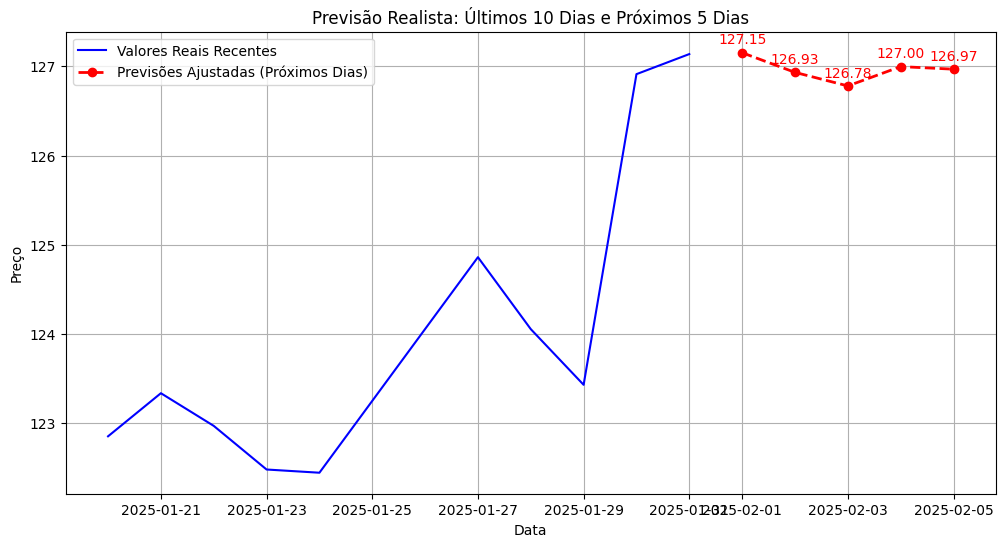

In [100]:
# Configuração do gráfico com previsões ajustadas
plt.figure(figsize=(12, 6))

# Últimos 10 dias de dados reais
plt.plot(df.index[-10:], df['Fechamento'][-10:], label='Valores Reais Recentes', color='blue')

# Previsões futuras ajustadas
plt.plot(future_features.index, future_predictions_adjusted,
         label='Previsões Ajustadas (Próximos Dias)', color='red', linestyle='--', marker='o', linewidth=2)
for date, prediction in zip(future_features.index, future_predictions_adjusted):
    plt.text(date, prediction + 0.1, f'{prediction:.2f}', fontsize=10, ha='center', color='red')

# Configurações de legendas e grid
plt.title('Previsão Realista: Últimos 10 Dias e Próximos 5 Dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)

plt.show()